In [1]:
import json
import pickle
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences
from constants import *
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [2]:
def save_json(data, filename):
    with open(filename, 'w') as f:
        json.dump(data, f)

def load_json(filename):
    with open(filename, 'r') as f:
        file = json.load(f)
    return file

def load_pickle(filename):
    with open(filename, 'rb') as f:
        file = pickle.load(f)
    return file

In [3]:
def get_best_prediction(predicts):
    index = predicts.argmax()
    best = predicts[index]
    return best, index

def get_best_predictions(predictions):
    bests = []
    for prediction in predictions:
        temp = get_best_prediction(prediction)
        if temp[0] > 0.6:
            bests.append(temp)
    
    return bests

In [4]:
def plot_predictions(categories, count_class, filename):
    fig, ax = plt.subplots()
    ax.barh(categories, count_class)
    plt.savefig('graph/')
    plt.show()

In [5]:
def get_count_class(best_predictions):
    count = [0]*len(categories)
    for pred in best_predictions:
        count[pred[1]] += 1
    return count

In [6]:
def load_tokenizer(filename):
    with open(filename, 'rb') as f:
        t = pickle.load(f)
    return t

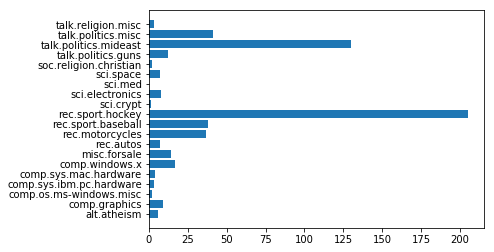

In [7]:
songs = load_json(SONGS_DOC_FILENAME)
categories = load_json(CATEGORIES_FILENAME)

max_words = 20000
pad = 2000
dimension = 300
conv_size = 512
batch_size = 128
data = '20new_songs'

tokenizer = load_tokenizer('model/tokenizer_' + str(max_words))
name = '-'.join([data, str(max_words), str(pad), str(dimension), str(conv_size), str(batch_size)])
model = load_model('models/' + name)
songs_encoded = tokenizer.texts_to_sequences(songs)
songs_padded = pad_sequences(songs_encoded, pad)
predictions = model.predict(songs_padded)
best_predictions = get_best_predictions(predictions)
count_class = get_count_class(best_predictions)
plot_predictions(categories, count_class, name)

In [13]:
for pred in best_predictions:
    if pred[1] == 10:
        print(pred)

(0.93096304, 10)
(0.60941392, 10)
(0.97391677, 10)
(0.6674118, 10)
(0.7484349, 10)
(0.60954434, 10)
(0.81409544, 10)
(0.89261049, 10)
(0.80604368, 10)
(0.76937246, 10)
(0.98899263, 10)
(0.97777951, 10)
(0.77486813, 10)
(0.74668103, 10)
(0.68824404, 10)
(0.65519631, 10)
(0.98502499, 10)
(0.7153132, 10)
(0.66475719, 10)
(0.99936205, 10)
(0.66760159, 10)
(0.7804727, 10)
(0.83878738, 10)
(0.76133251, 10)
(0.79353684, 10)
(0.98899263, 10)
(0.75488621, 10)
(0.88133782, 10)
(0.7144767, 10)
(0.97463357, 10)
(0.83520985, 10)
(0.82985079, 10)
(0.98899263, 10)
(0.71282542, 10)
(0.77643347, 10)
(0.60982466, 10)
(0.63416463, 10)
(0.96547925, 10)
(0.66073895, 10)
(0.71485209, 10)
(0.77735227, 10)


In [ ]:
songs = load_json(SONGS_DOC_FILENAME)
categories = load_json(CATEGORIES_FILENAME)

max_wordss = [1000, 5000, 10000, 20000]
pads = [200, 500, 1000, 2000]
dimensions = [100, 300]
conv_sizes = [32, 64, 128, 256, 512]
batch_sizes = [64, 128, 256]
datas = ['20new_songs', '20new', 'songs']

#max_words = max_wordss[0]
#pad = pads[0]
#dimension = dimensions[0]
#conv_size = conv_sizes[0]
#batch_size = batch_sizes[0]
#data = datas[0]
for max_words in max_wordss:
    tokenizer = load_tokenizer('model/tokenizer_' + str(max_words))
    for pad in pads:
        for dimension in dimensions:
            for conv_size in conv_sizes:
                for batch_size in batch_sizes:
                    for data in datas:
                        try:
                            name = '-'.join([data, str(max_words), str(pad), str(dimension), str(conv_size), str(batch_size)])
                            model = load_model('models/' + name)
                            songs_encoded = tokenizer.texts_to_sequences(songs)
                            songs_padded = pad_sequences(songs_encoded, pad)
                            predictions = model.predict(songs_padded)
                            best_predictions = get_best_predictions(predictions)
                            count_class = get_count_class(best_predictions)
                            plot_predictions(categories, count_class, name)
                        except OSError:
                            pass